In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pynbody
from matplotlib.colors import LogNorm
from michaels_functions import center_and_r_vir, remove_bulk_velocity, read_unit_from_info

In [2]:
path = "/scratch/gpfs/eg2222/agora/eden/"
data = pynbody.load(path + "output_00038")
data.physical_units()
time = data.properties['time']
print("time=",time.in_units("Myr"),"Myr")
omema_m,omega_b,unit_l, unit_d, unit_t = read_unit_from_info(data)
unit_v = unit_l/unit_t
unit_b = np.sqrt(4*np.pi*unit_d)*unit_v
print(unit_l, unit_d, unit_t, unit_b)

time= 483.98772224207875 Myr
3.085677581282e+21 6.77025430198932e-23 470430312423675.0 0.00019132101231911184


In [5]:
data.gas.keys()

['metal',
 'p',
 'B_x_left',
 'vy',
 'B_z_left',
 'y',
 'scalar_02',
 'rho',
 'B_y_left',
 'vz',
 'vx',
 'B_y_right',
 'x',
 'pos',
 'mass',
 'smooth',
 'vel',
 'B_x_right',
 'B_z_right',
 'scalar_01',
 'z']

In [4]:
data.gas['mass'] = data.gas['rho'] * data.gas['smooth']**3
data.gas['bx'] = 0.5 * (data.gas['bxl'] + data.gas['bxr']) * unit_b
data.gas['by'] = 0.5 * (data.gas['byl'] + data.gas['byr']) * unit_b
data.gas['bz'] = 0.5 * (data.gas['bzl'] + data.gas['bzr']) * unit_b
data.gas['b2'] = data.gas['bx']**2 + data.gas['by']**2 + data.gas['bz']**2
data.gas['b'] = np.sqrt(data.gas['b2'])
data.gas['sigma1d'] = np.sqrt(2/3*data.gas['eturb'])*unit_v/1e5
#data.gas.keys()

KeyError: 'No array bxl for family gas'

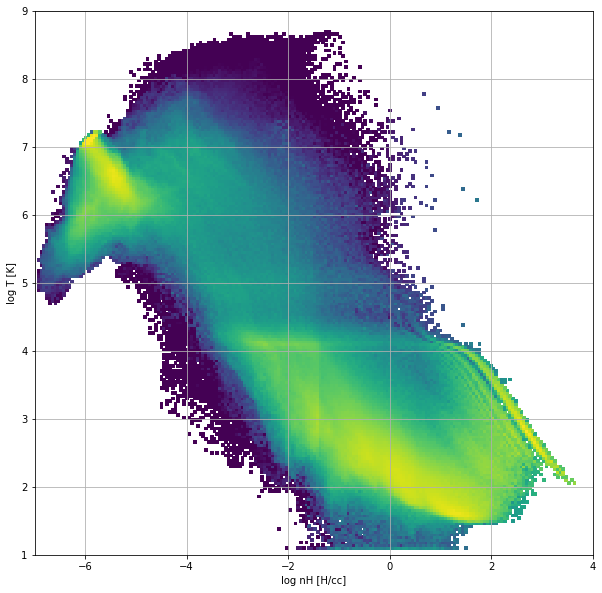

In [5]:
plt.figure(figsize=(10,10))
plt.xlabel("log nH [H/cc]")
plt.ylabel("log T [K]")

hist, yy, xx = np.histogram2d(np.log10(data.gas["temp"].in_units("K")),
                              np.log10(data.gas["rho"].in_units("m_p cm**-3")),
                              weights=data.gas["mass"].in_units('Msol'), 
                              bins=200, range=[[1, 9],[-7, 4]])
plt.pcolormesh(xx, yy, hist, norm=LogNorm(vmin=100,vmax=1e7))
plt.grid()

In [9]:
print(np.sum(data.gas['mass'].in_units('g')))

1.3895574667940433e+43


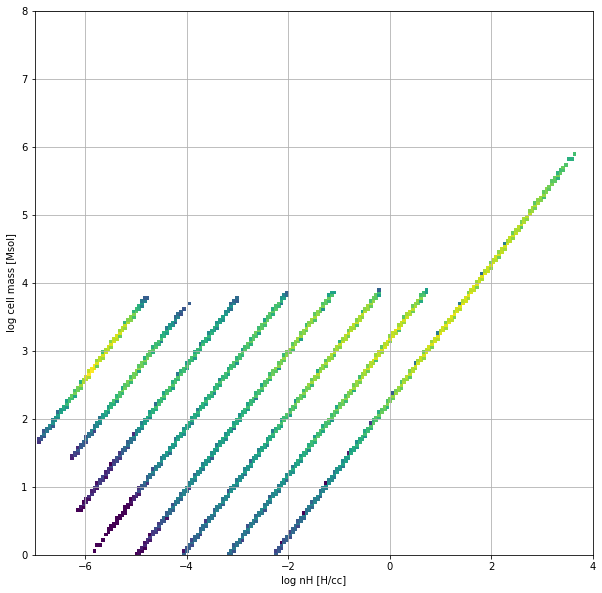

In [6]:
plt.figure(figsize=(10,10))
plt.xlabel("log nH [H/cc]")
plt.ylabel("log cell mass [Msol]")

hist, yy, xx = np.histogram2d(np.log10(data.gas["mass"].in_units("Msol")),
                              np.log10(data.gas["rho"].in_units("m_p cm**-3")),
                              weights=data.gas["mass"].in_units('Msol'), 
                              bins=200, range=[[0, 8],[-7, 4]])
plt.pcolormesh(xx, yy, hist, norm=LogNorm(vmin=100,vmax=1e8))
plt.grid()

9.617800346072477e-26 0.00019635335627953506


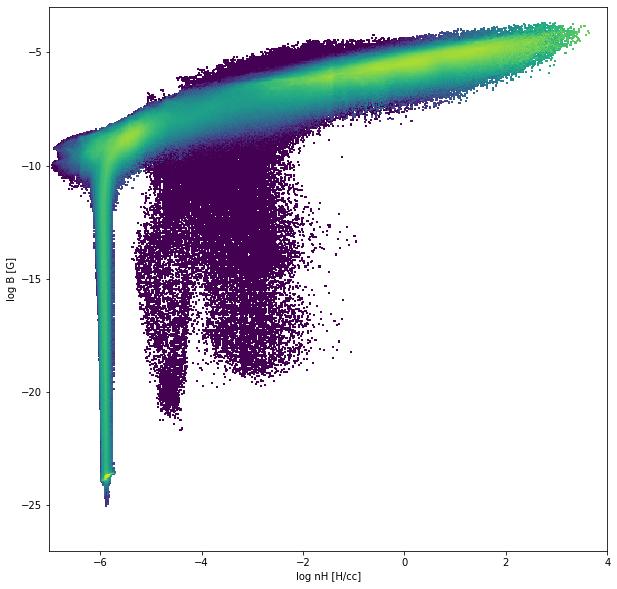

In [7]:
plt.figure(figsize=(10,10))
plt.xlabel("log nH [H/cc]")
plt.ylabel("log B [G]")

print(min(data.gas["b"]),max(data.gas["b"]))

hist, yy, xx = np.histogram2d(np.log10(data.gas["b"]),
                              np.log10(data.gas["rho"].in_units("m_p cm**-3")),
                              weights=data.gas["mass"].in_units('Msol'), 
                              bins=500, range=[[-27, -3],[-7, 4]])
plt.pcolormesh(xx, yy, hist, norm=LogNorm(vmin=100,vmax=1e7))

1.0077764335395831 2151.1534454340326


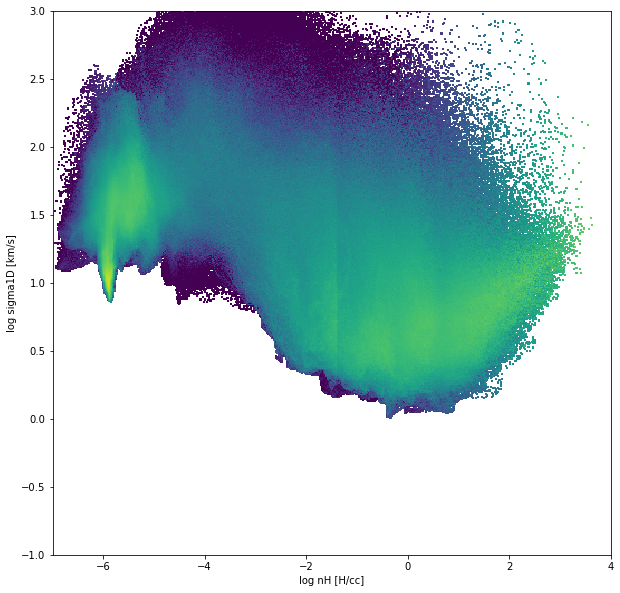

In [8]:
plt.figure(figsize=(10,10))
plt.xlabel("log nH [H/cc]")
plt.ylabel("log sigma1D [km/s]")

print(min(data.gas["sigma1d"]),max(data.gas["sigma1d"]))

hist, yy, xx = np.histogram2d(np.log10(data.gas["sigma1d"]),
                              np.log10(data.gas["rho"].in_units("m_p cm**-3")),
                              weights=data.gas["mass"].in_units('Msol'), 
                              bins=500, range=[[-1, 3],[-7, 4]])
plt.pcolormesh(xx, yy, hist, norm=LogNorm(vmin=100,vmax=1e7))

/home/rt3504/.local/lib/python3.8/site-packages/pynbody/plot/sph.py:460: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return p.imshow(im[::-1, :].view(np.ndarray), extent=(-width / 2, width / 2, -width / 2, width / 2),


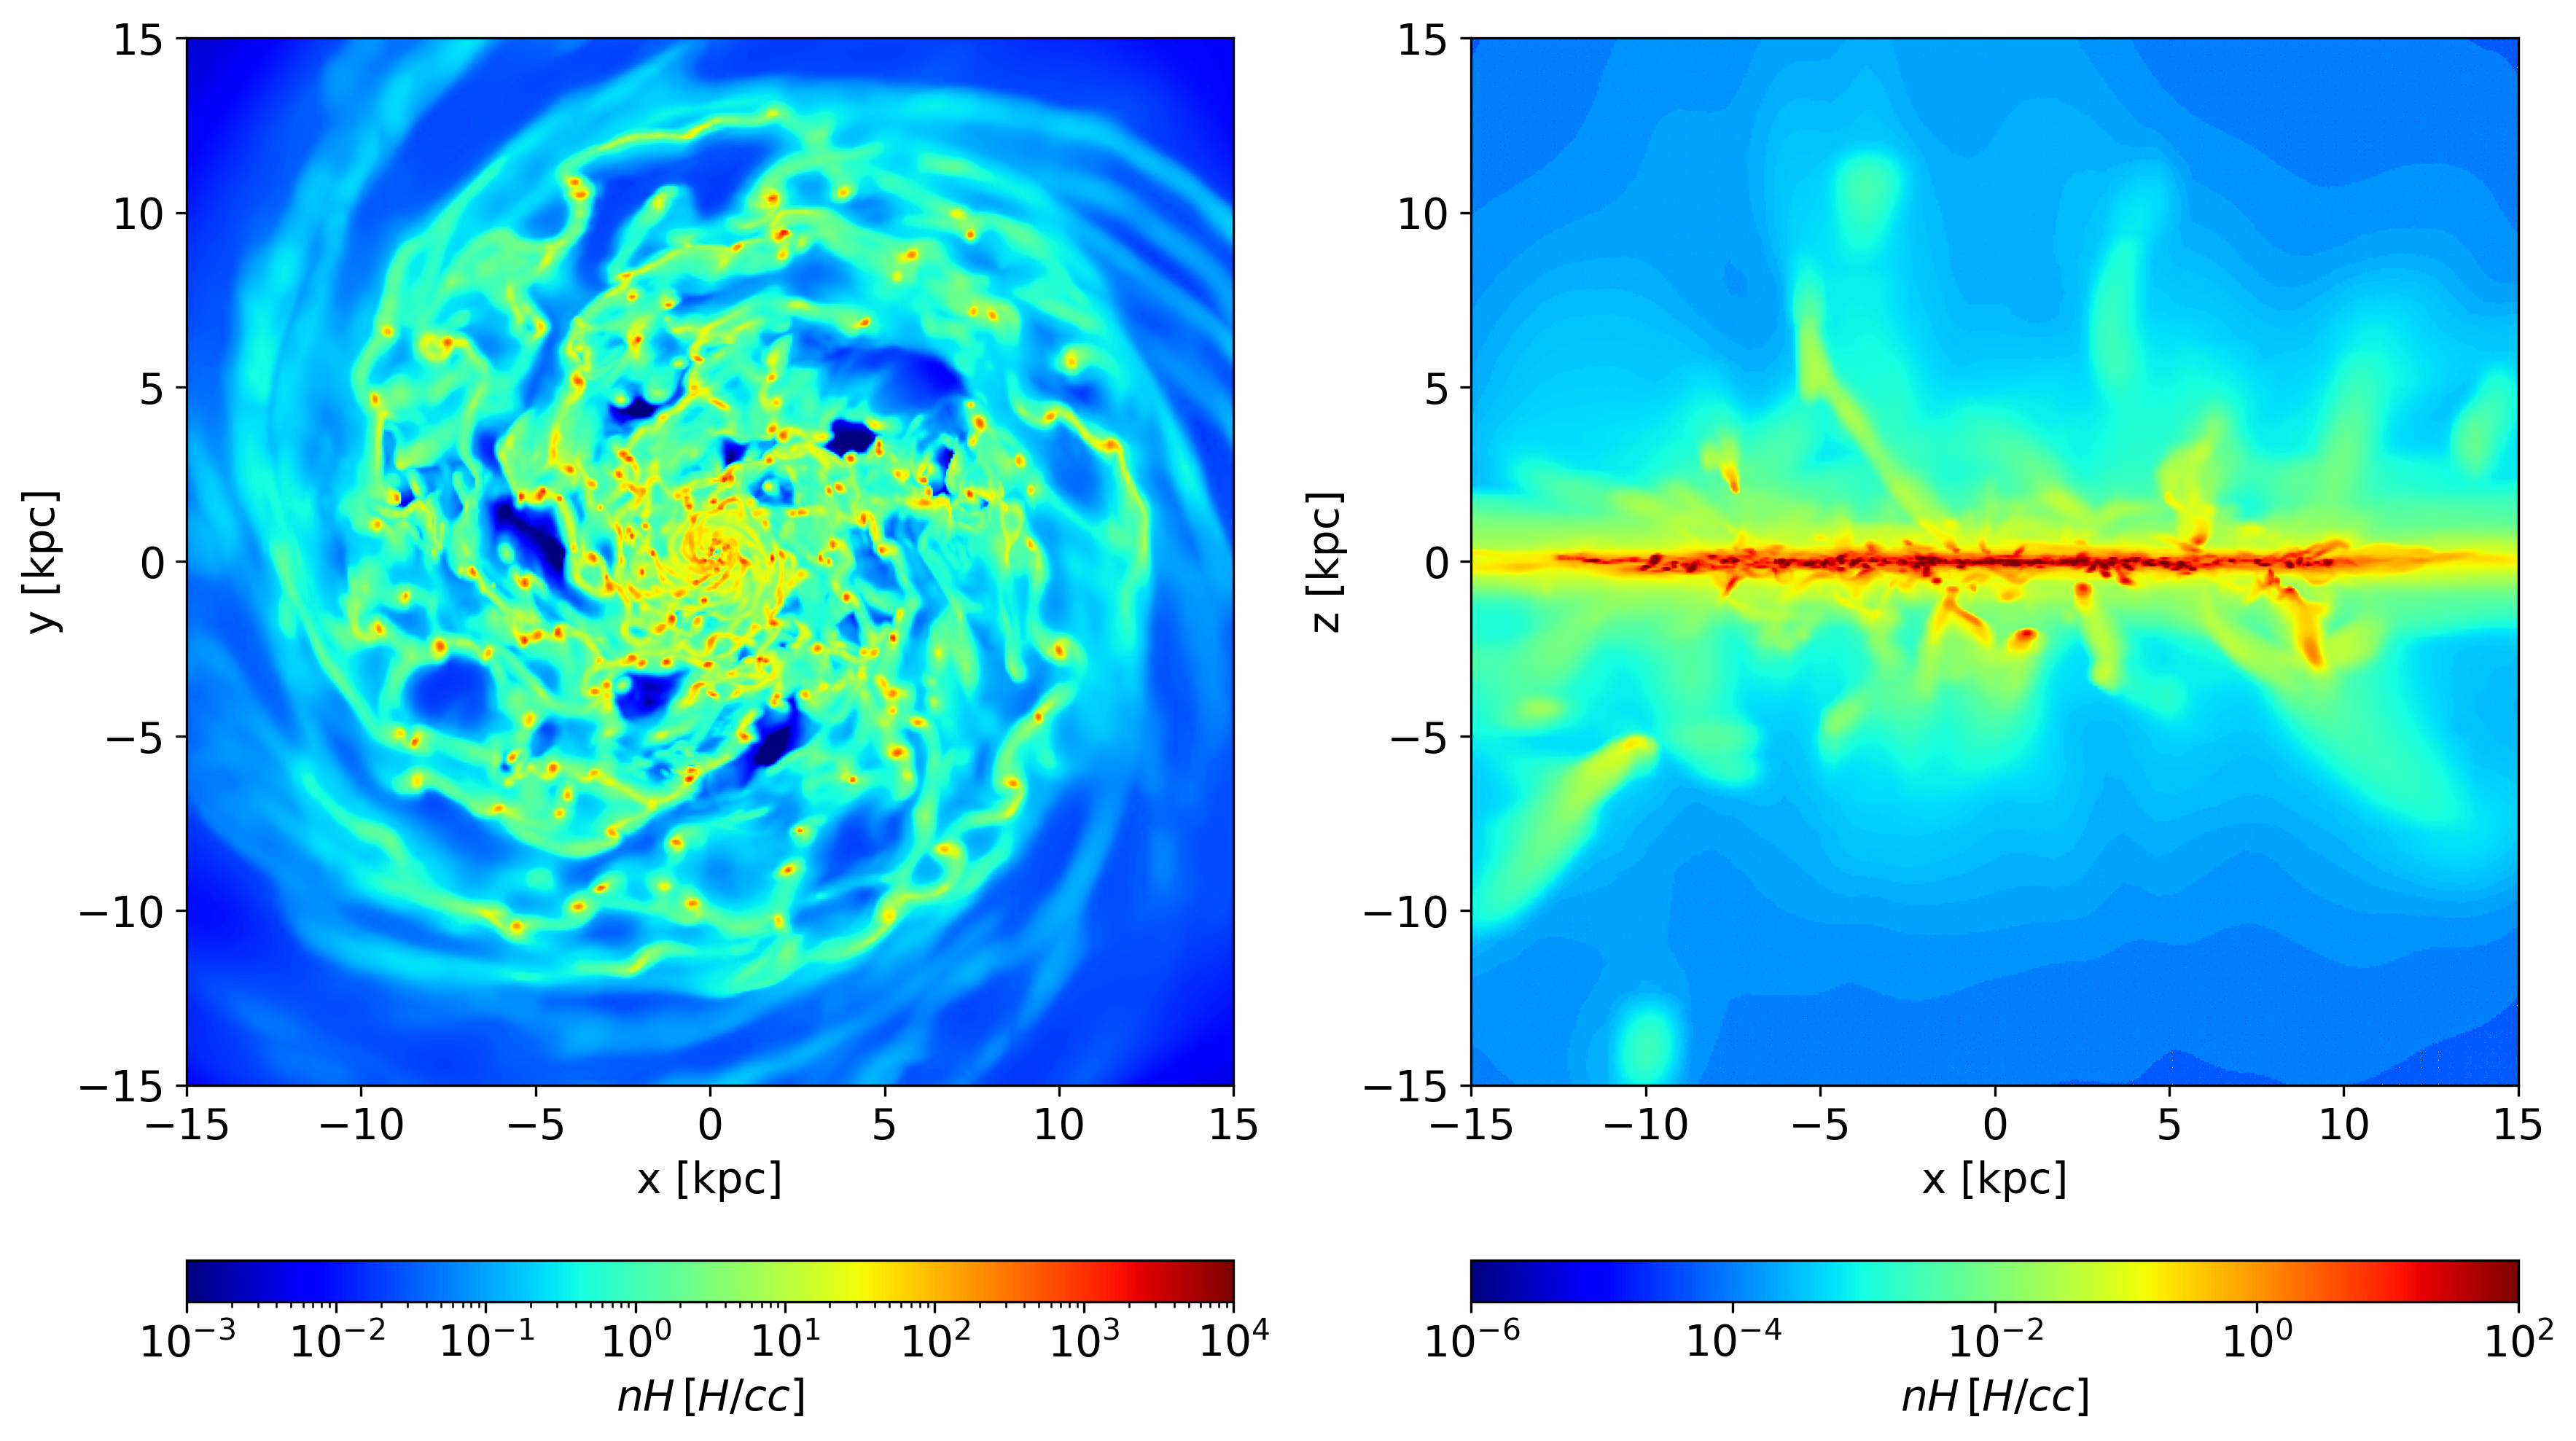

In [9]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,7), dpi=300,
                       gridspec_kw={'width_ratios':[1,1],'height_ratios':[28,1]})

with pynbody.analysis.angmom.faceon(data):
    im0 = pynbody.plot.image(data.gas, qty='rho', units='m_p cm**-3', width="%f kpc"%(30), ret_im=True,
                        log=True, resolution=500, vmin=1e-3, vmax=1e4, cmap="jet", av_z="rho",   
                        subplot=ax[0,0],show_cbar=False)
    
with pynbody.analysis.angmom.sideon(data):
    im1 = pynbody.plot.image(data.gas, qty='rho', units='m_p cm**-3', width="%f kpc"%(30), ret_im=True,
                        log=True, resolution=500, vmin=1e-6, vmax=1e2, cmap="jet", av_z="rho",
                        subplot=ax[0,1],show_cbar=False)
    
ax[0,0].set_xlabel('x [kpc]')
ax[0,0].set_ylabel('y [kpc]')
ax[0,1].set_xlabel('x [kpc]')
ax[0,1].set_ylabel('z [kpc]')

fig.colorbar(im0, cax=ax[1,0], orientation='horizontal', label=r"$nH \, [H/cc]$")
fig.colorbar(im1, cax=ax[1,1], orientation='horizontal', label=r"$nH \, [H/cc]$")

plt.tight_layout()

#plt.savefig(img_path+'Mag_norm_a_079.png', bbox_inches = 'tight')

plt.show()

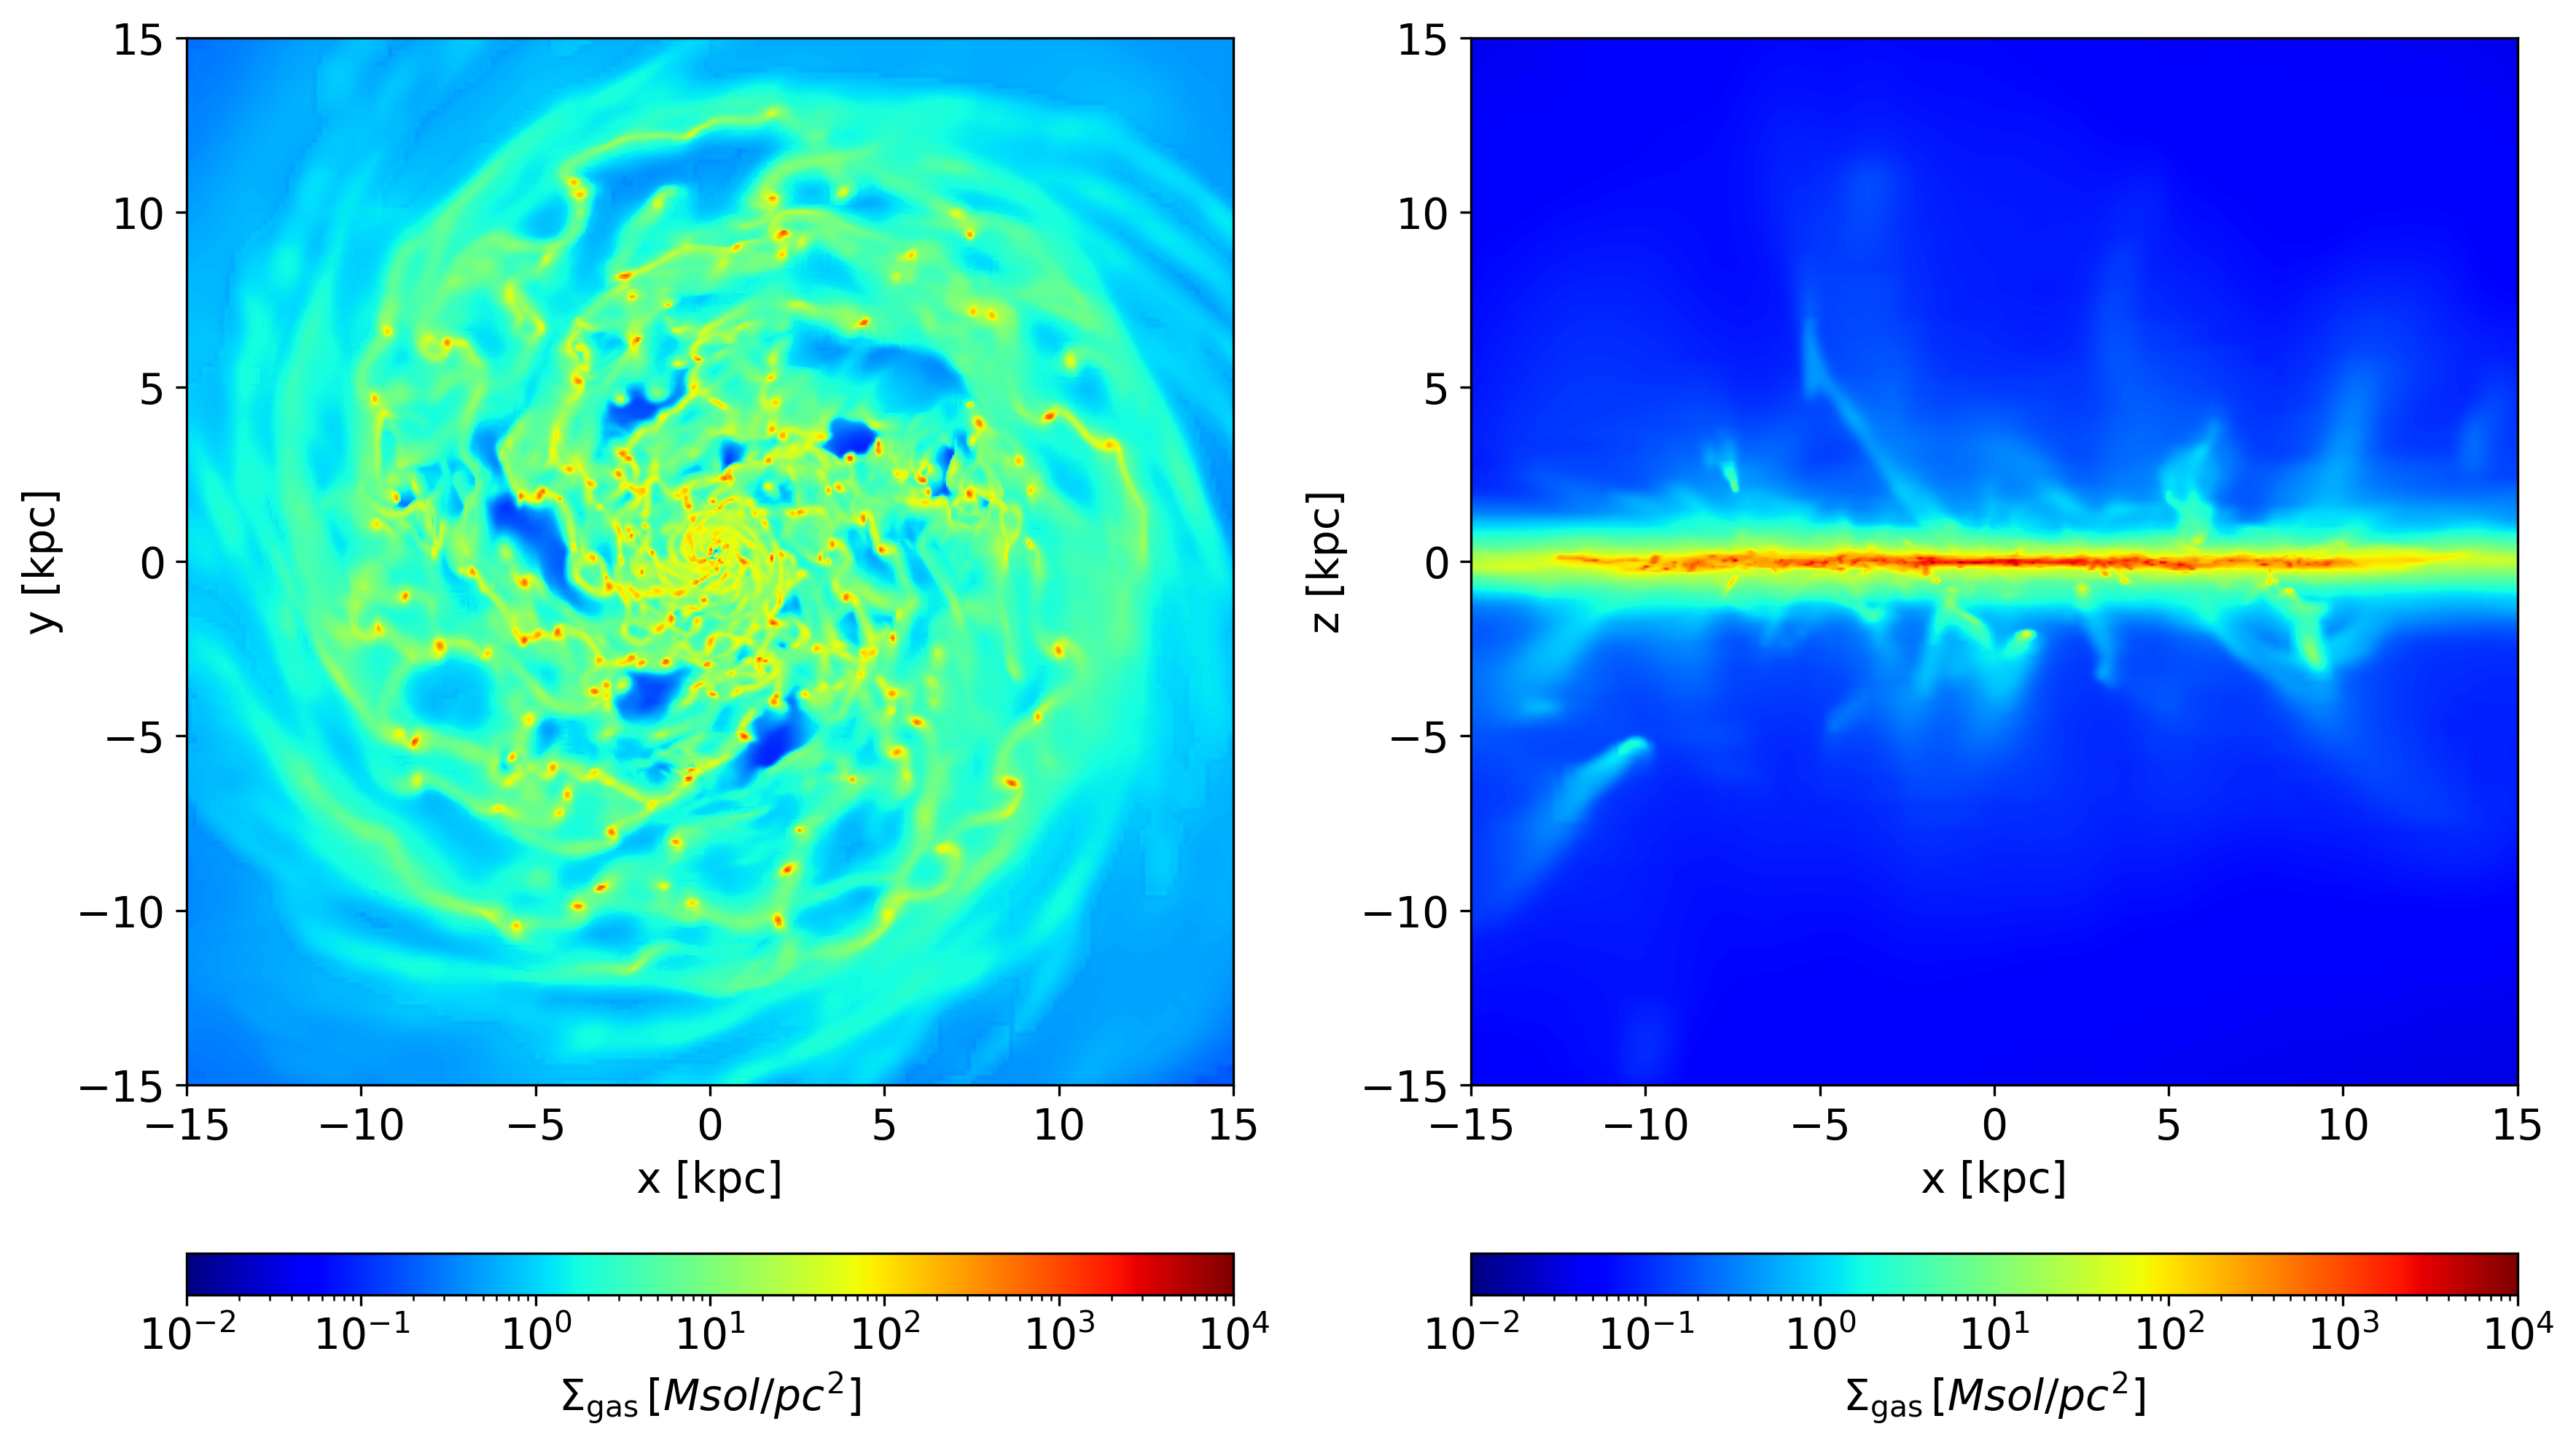

In [10]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,7), dpi=300,
                       gridspec_kw={'width_ratios':[1,1],'height_ratios':[28,1]})

with pynbody.analysis.angmom.faceon(data):
    im0 = pynbody.plot.image(data.gas, units='Msol pc**-2', width="%f kpc"%(30), ret_im=True,
                        log=True, resolution=500, vmin=1e-2, vmax=1e4, cmap="jet",   
                        subplot=ax[0,0],show_cbar=False)
    
with pynbody.analysis.angmom.sideon(data):
    im1 = pynbody.plot.image(data.gas, units='Msol pc**-2', width="%f kpc"%(30), ret_im=True,
                        log=True, resolution=500, vmin=1e-2, vmax=1e4, cmap="jet",
                        subplot=ax[0,1],show_cbar=False)
    
ax[0,0].set_xlabel('x [kpc]')
ax[0,0].set_ylabel('y [kpc]')
ax[0,1].set_xlabel('x [kpc]')
ax[0,1].set_ylabel('z [kpc]')

fig.colorbar(im0, cax=ax[1,0], orientation='horizontal', label=r"$\Sigma_{\rm gas} \, [Msol/pc^2]$")
fig.colorbar(im1, cax=ax[1,1], orientation='horizontal', label=r"$\Sigma_{\rm gas} \, [Msol/pc^2]$")

plt.tight_layout()

#plt.savefig(img_path+'Mag_norm_a_079.png', bbox_inches = 'tight')

plt.show()

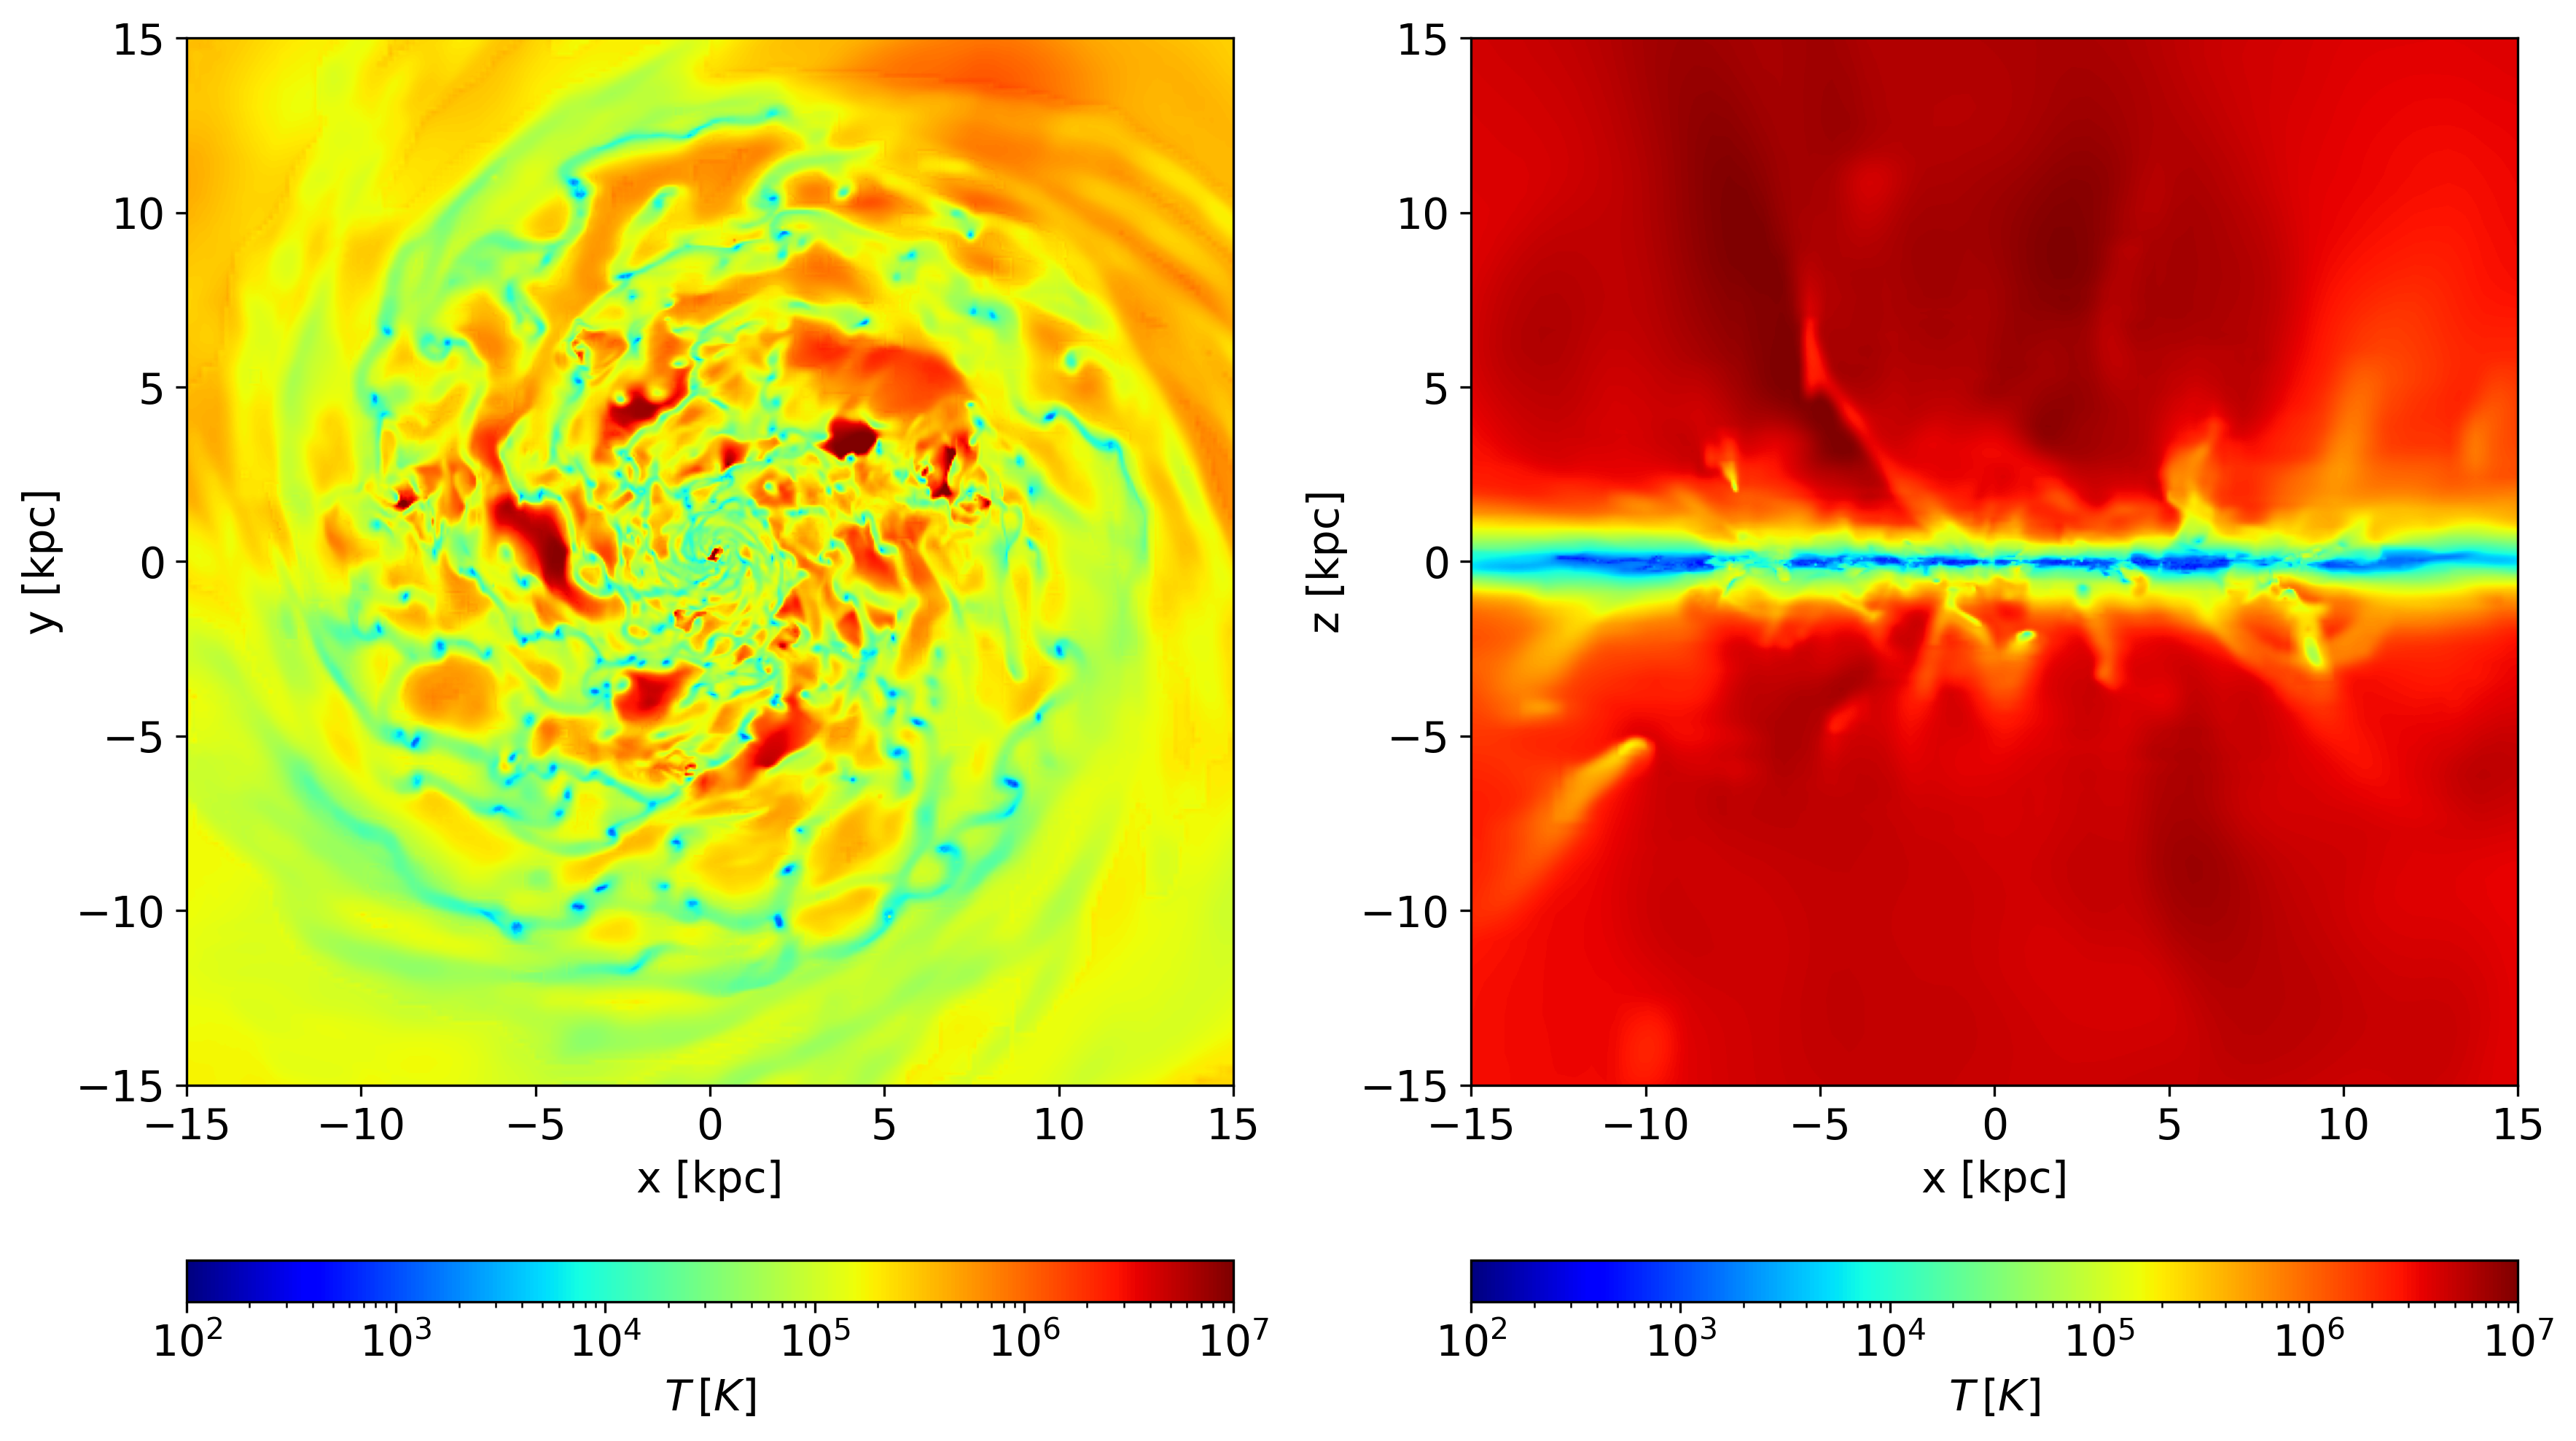

In [11]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,7), dpi=300,
                       gridspec_kw={'width_ratios':[1,1],'height_ratios':[28,1]})

with pynbody.analysis.angmom.faceon(data):
    im0 = pynbody.plot.image(data.gas, qty='temp', width="%f kpc"%(30), ret_im=True,
                        log=True, resolution=500, vmin=1e2, vmax=1e7, cmap="jet", av_z="rho",   
                        subplot=ax[0,0],show_cbar=False)
    
with pynbody.analysis.angmom.sideon(data):
    im1 = pynbody.plot.image(data.gas, qty='temp', width="%f kpc"%(30), ret_im=True,
                        log=True, resolution=500, vmin=1e2, vmax=1e7, cmap="jet", av_z="rho",
                        subplot=ax[0,1],show_cbar=False)
    
ax[0,0].set_xlabel('x [kpc]')
ax[0,0].set_ylabel('y [kpc]')
ax[0,1].set_xlabel('x [kpc]')
ax[0,1].set_ylabel('z [kpc]')

fig.colorbar(im0, cax=ax[1,0], orientation='horizontal', label=r"$T \, [K]$")
fig.colorbar(im1, cax=ax[1,1], orientation='horizontal', label=r"$T \, [K]$")

plt.tight_layout()

#plt.savefig(img_path+'Mag_norm_a_079.png', bbox_inches = 'tight')

plt.show()

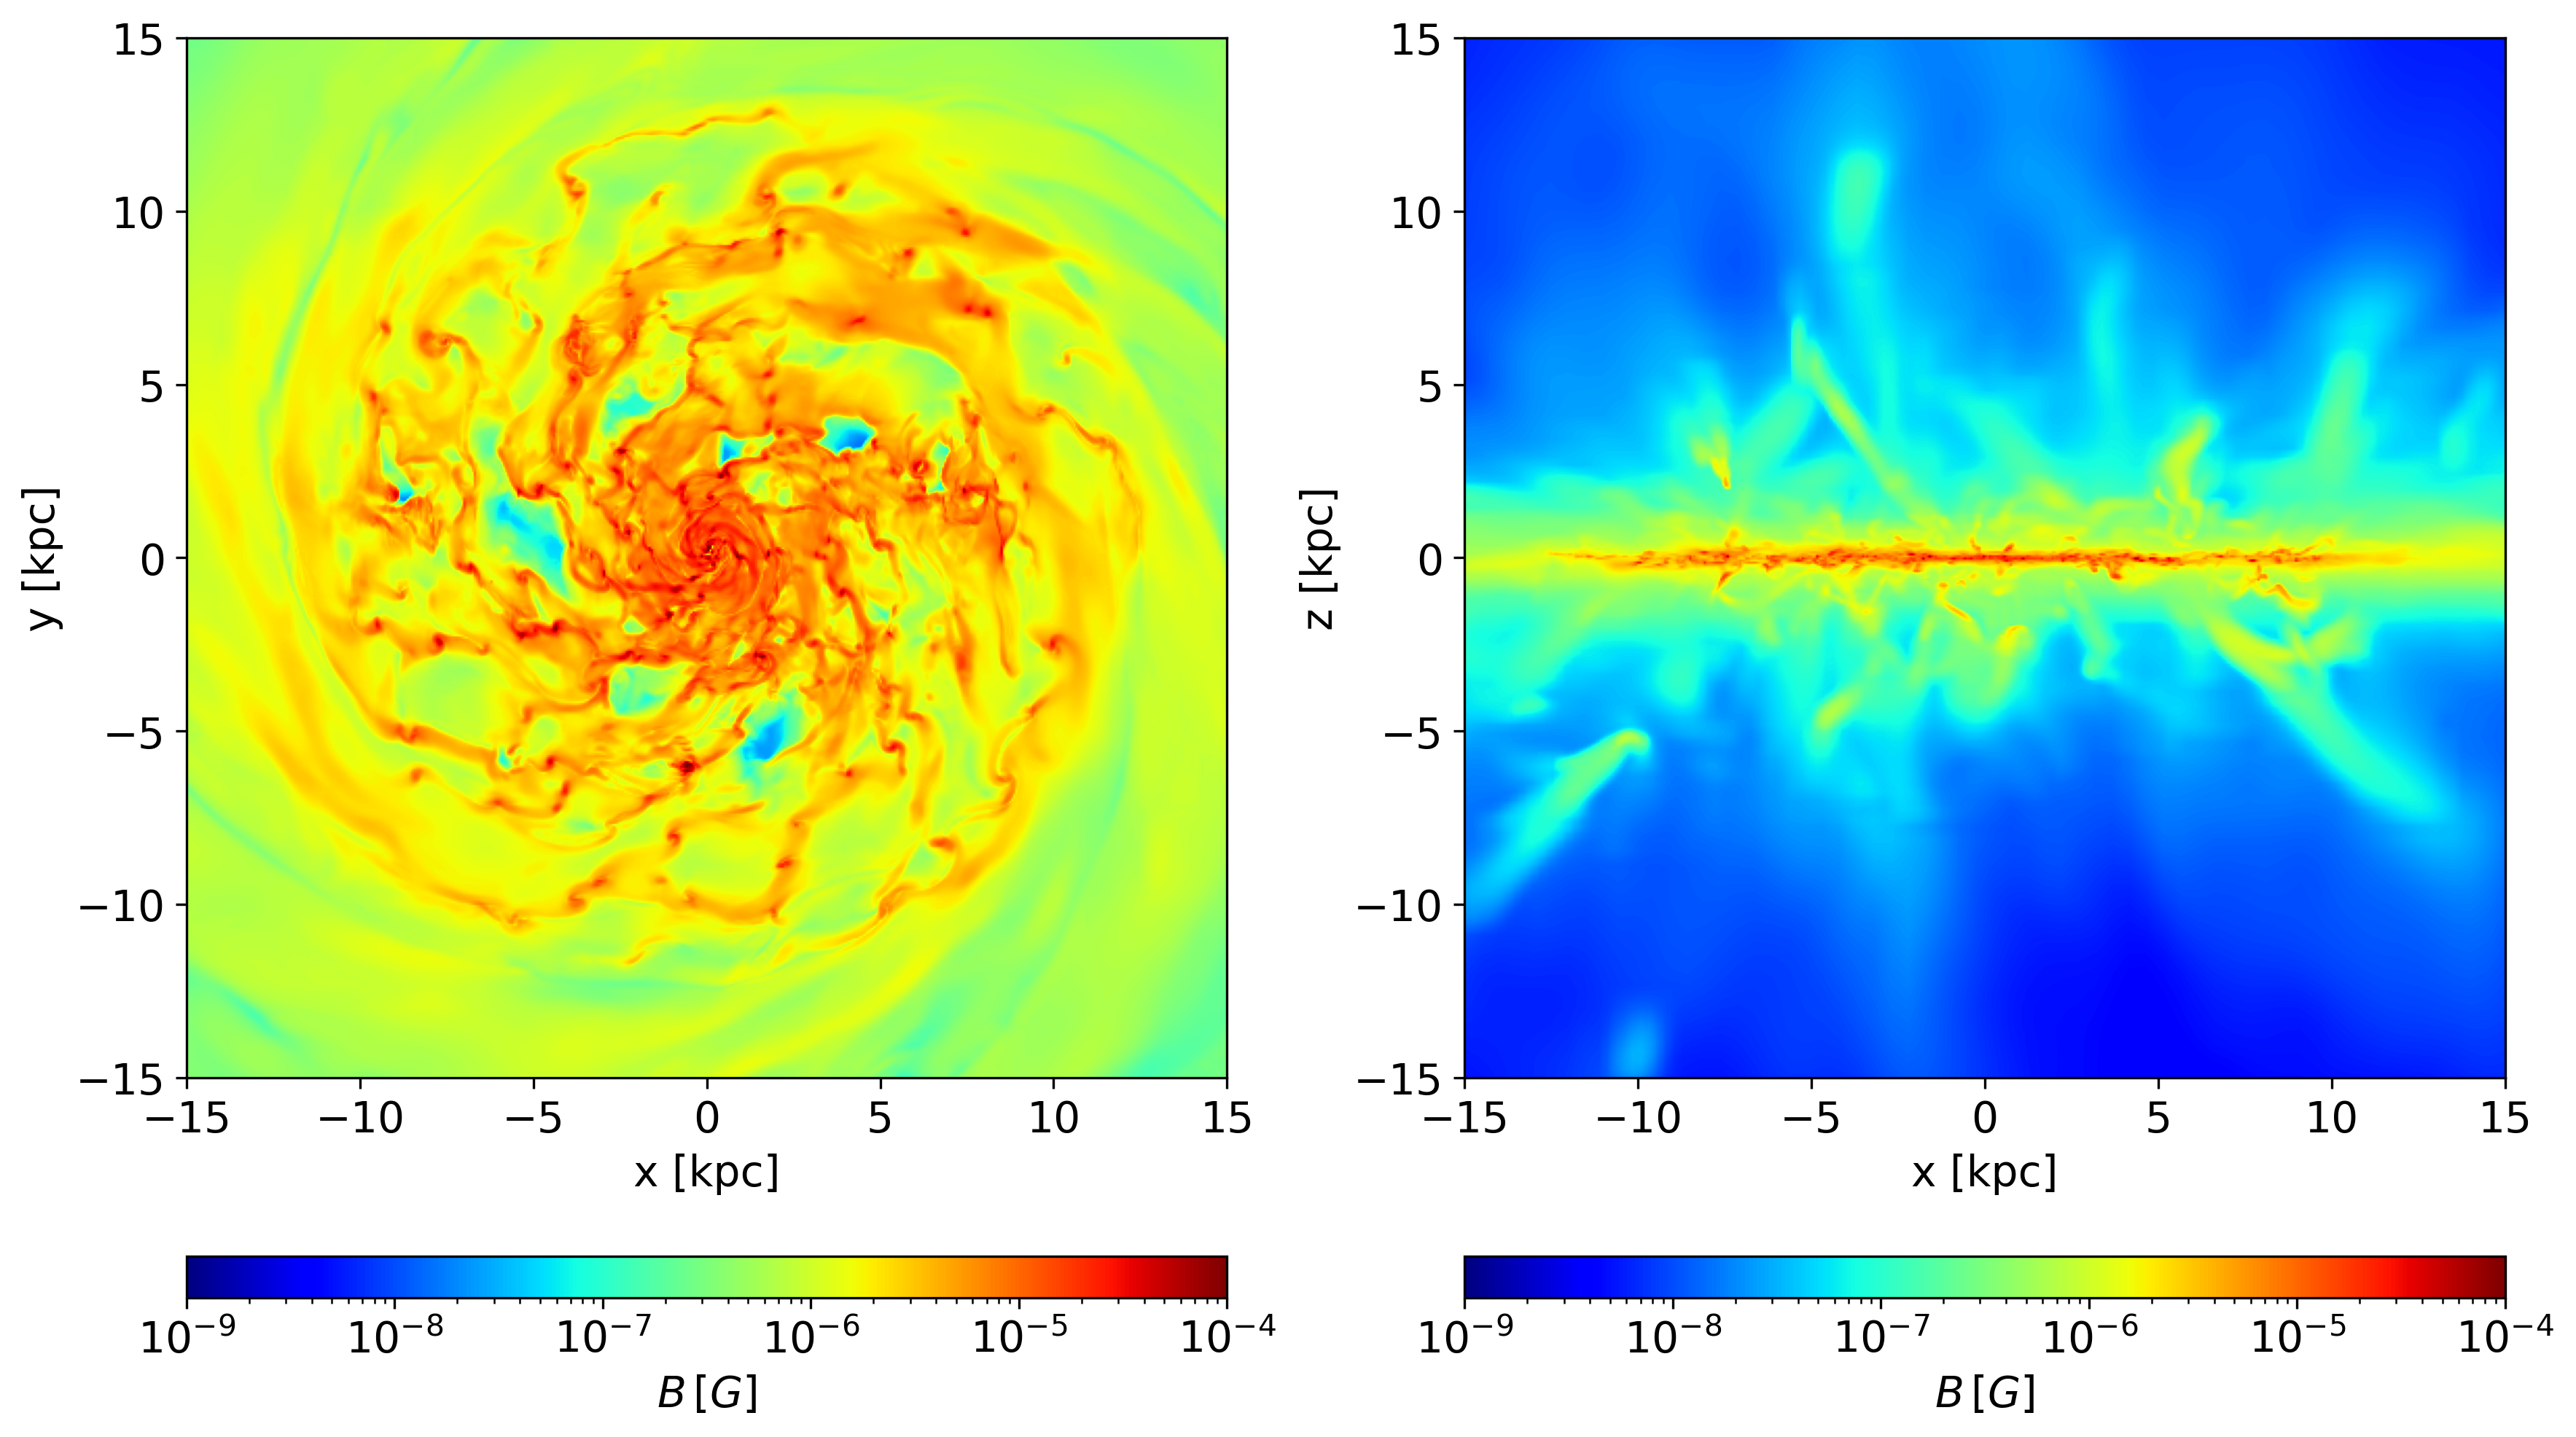

In [12]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,7), dpi=300,
                       gridspec_kw={'width_ratios':[1,1],'height_ratios':[28,1]})

with pynbody.analysis.angmom.faceon(data):
    im0 = pynbody.plot.image(data.gas, qty='b', width="%f kpc"%(30), ret_im=True,
                        log=True, resolution=500, vmin=1e-9, vmax=1e-4, cmap="jet", av_z="rho",   
                        subplot=ax[0,0],show_cbar=False)
    
with pynbody.analysis.angmom.sideon(data):
    im1 = pynbody.plot.image(data.gas, qty='b', width="%f kpc"%(30), ret_im=True,
                        log=True, resolution=500, vmin=1e-9, vmax=1e-4, cmap="jet", av_z="rho",
                        subplot=ax[0,1],show_cbar=False)
    
ax[0,0].set_xlabel('x [kpc]')
ax[0,0].set_ylabel('y [kpc]')
ax[0,1].set_xlabel('x [kpc]')
ax[0,1].set_ylabel('z [kpc]')

fig.colorbar(im0, cax=ax[1,0], orientation='horizontal', label=r"$B \, [G]$")
fig.colorbar(im1, cax=ax[1,1], orientation='horizontal', label=r"$B \, [G]$")

plt.tight_layout()

#plt.savefig(img_path+'Mag_norm_a_079.png', bbox_inches = 'tight')

plt.show()

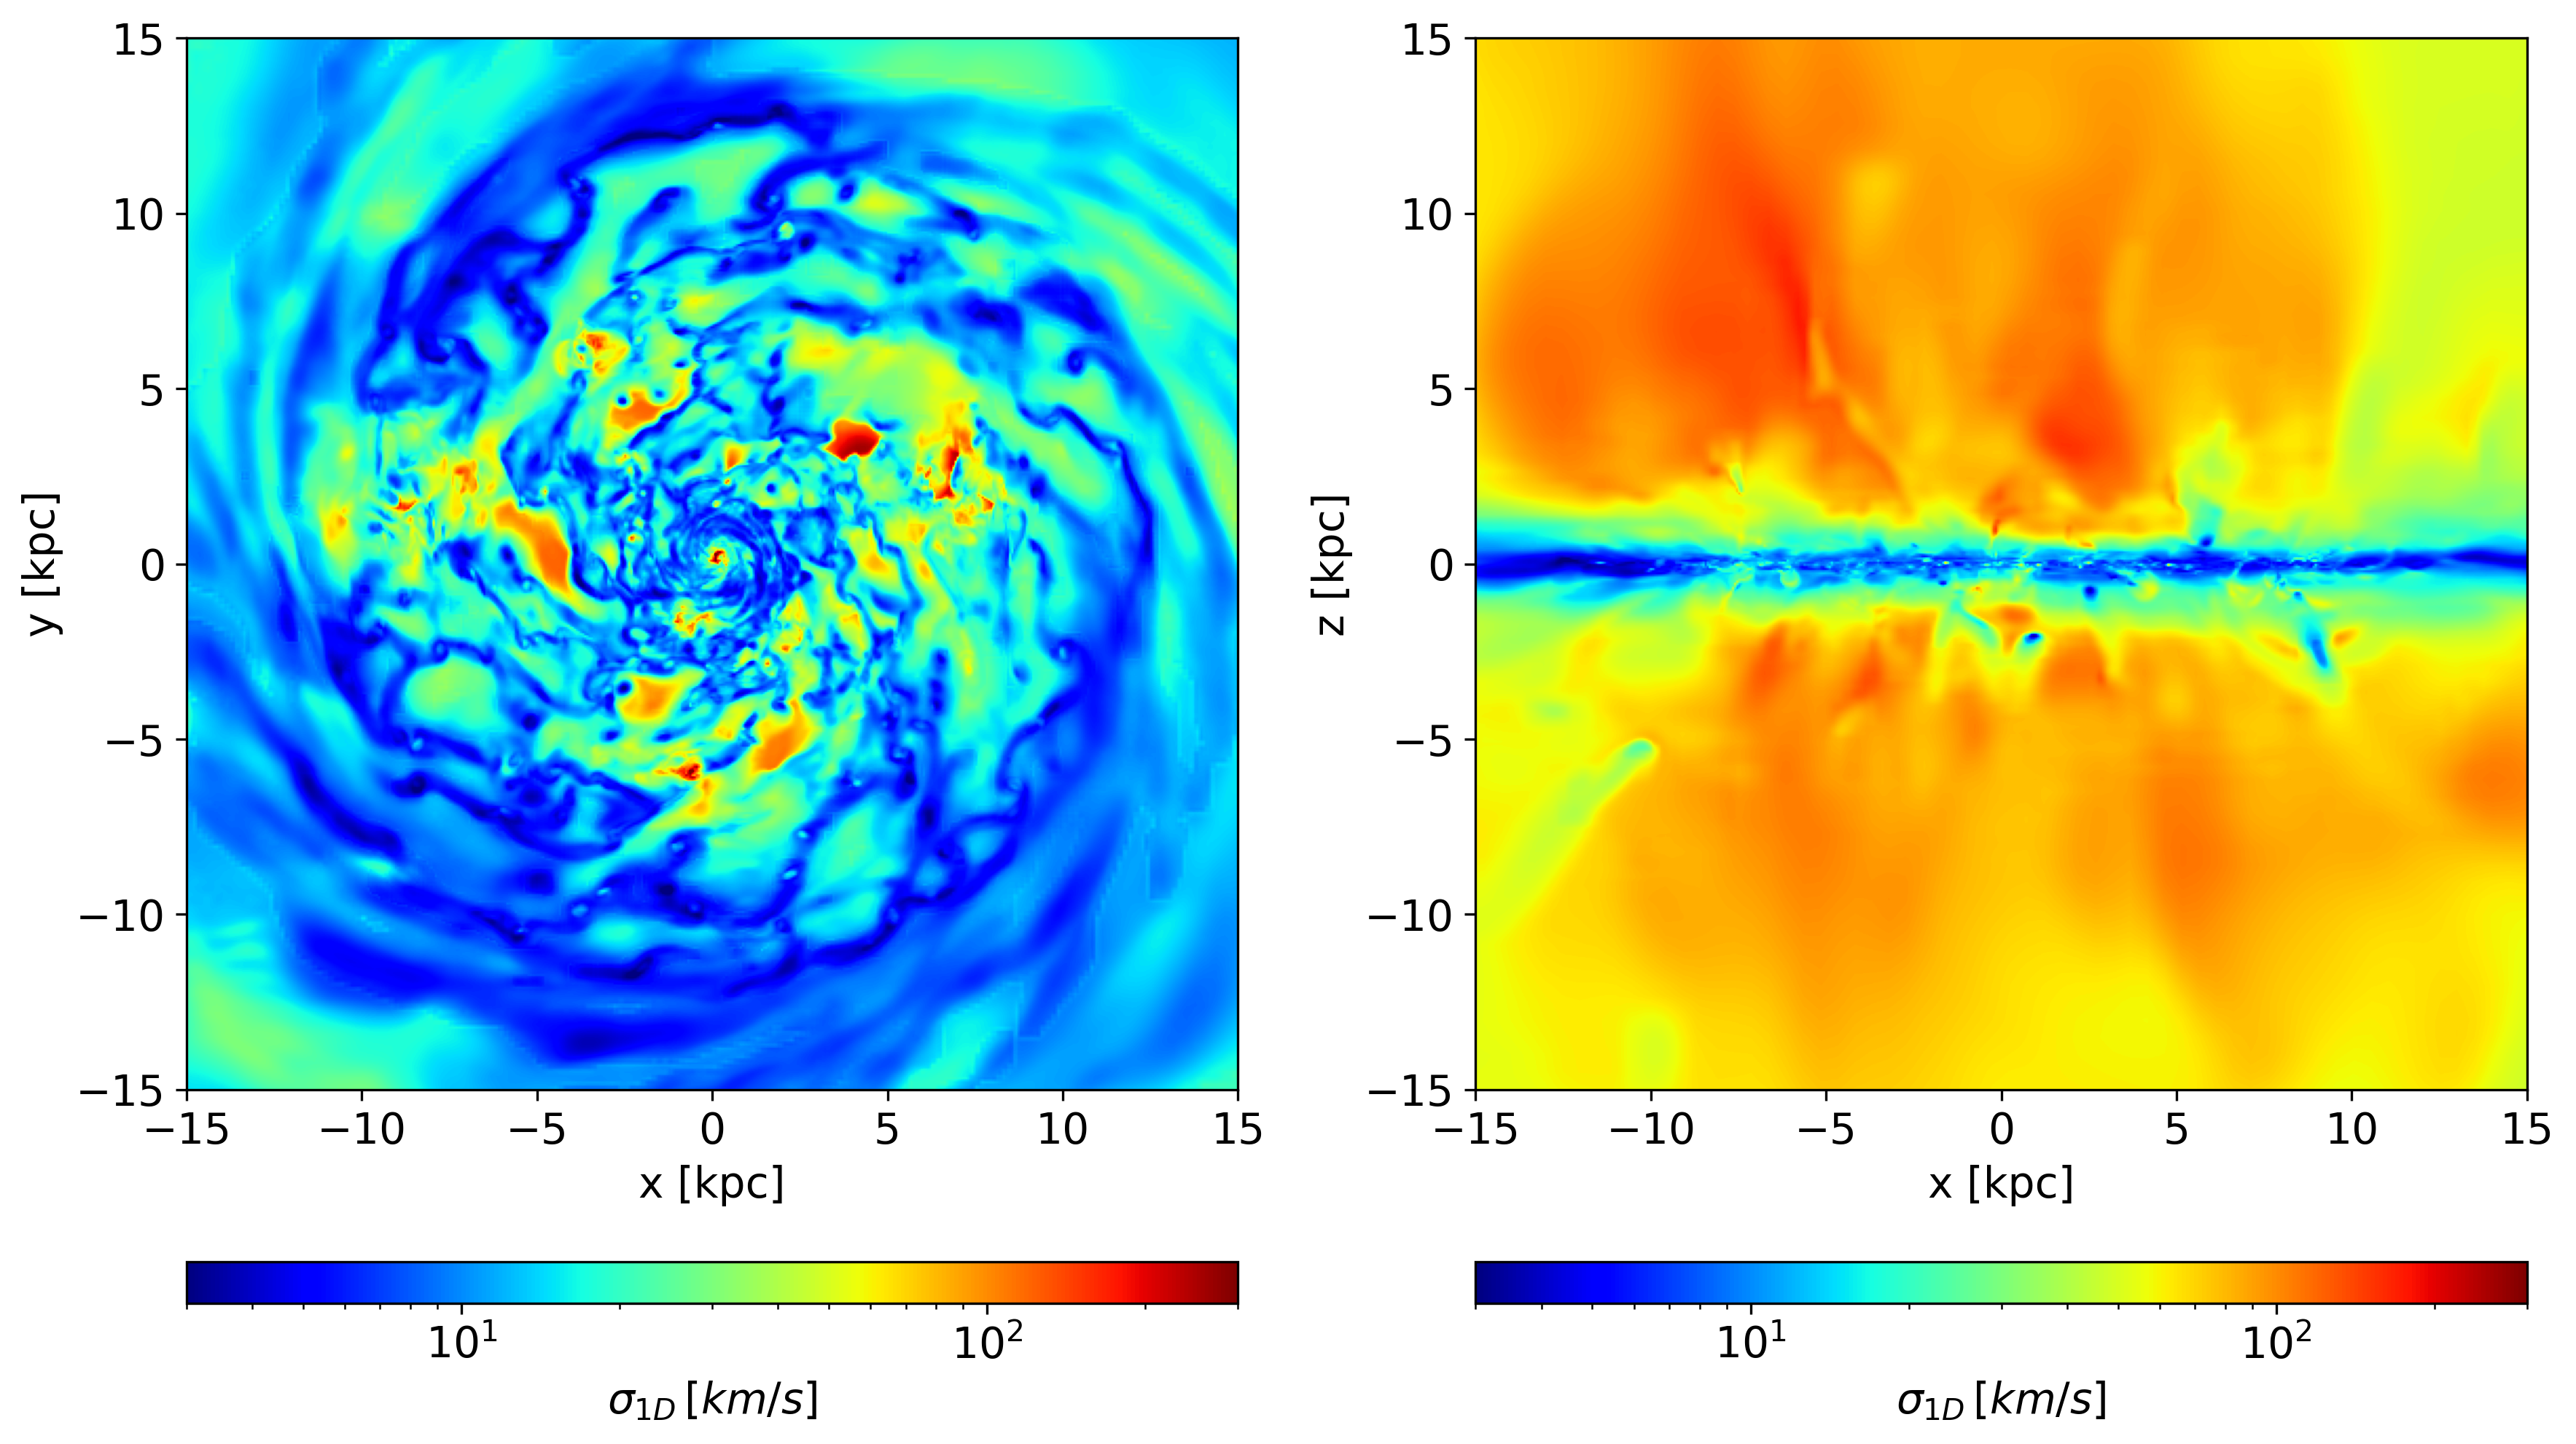

In [13]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,7), dpi=300,
                       gridspec_kw={'width_ratios':[1,1],'height_ratios':[28,1]})

with pynbody.analysis.angmom.faceon(data):
    im0 = pynbody.plot.image(data.gas, qty='sigma1d', width="%f kpc"%(30), ret_im=True,
                        log=True, resolution=500, vmin=3, vmax=300, cmap="jet", av_z="rho",   
                        subplot=ax[0,0],show_cbar=False)
    
with pynbody.analysis.angmom.sideon(data):
    im1 = pynbody.plot.image(data.gas, qty='sigma1d', width="%f kpc"%(30), ret_im=True,
                        log=True, resolution=500, vmin=3, vmax=300, cmap="jet", av_z="rho",
                        subplot=ax[0,1],show_cbar=False)
    
ax[0,0].set_xlabel('x [kpc]')
ax[0,0].set_ylabel('y [kpc]')
ax[0,1].set_xlabel('x [kpc]')
ax[0,1].set_ylabel('z [kpc]')

fig.colorbar(im0, cax=ax[1,0], orientation='horizontal', label=r"$\sigma_{1D} \, [km/s]$")
fig.colorbar(im1, cax=ax[1,1], orientation='horizontal', label=r"$\sigma_{1D} \, [km/s]$")

plt.tight_layout()

#plt.savefig(img_path+'Mag_norm_a_079.png', bbox_inches = 'tight')

plt.show()

In [34]:
with pynbody.analysis.angmom.faceon(data):
    p = pynbody.analysis.profile.Profile(data.gas,rmax='3.2 kpc',nbins=50)


In [35]:
p.keys()

['n']

(10000000.0, 200000000.0)

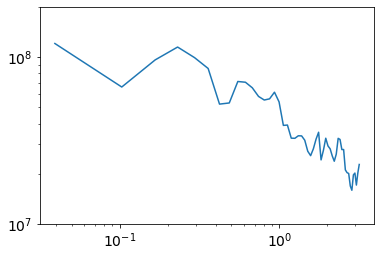

In [37]:
plt.plot(p['rbins'],p['density'])
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e7,2e8])